In [27]:
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from keras.models import Model, Sequential
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import pandas as pd
import glob
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

#####  let's have a look how the distribution of the Training dataset looks like:
      *equals Distribution :75 images in each subclass

In [2]:
def data_train():
        path_train=glob.glob('BreakHis_40XX/Train_40/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path','M_F_40'])
        patient_id=[]
        sublabel=[]
        class_40=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
                class_40.append('40_X')
        data['path']=path_train
        data['sublabel']=sublabel
        data['M_F_40']=class_40
        return data

data_train=data_train()
print('Number of images in the training set is {}'.format(len(data_train)))

Number of images in the training set is 600


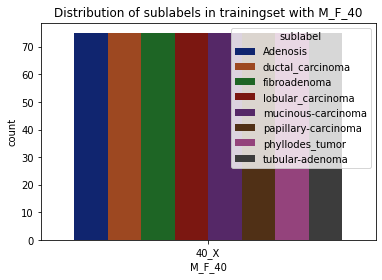

In [3]:
ax = sns.countplot(x="M_F_40",hue='sublabel', data=data_train,palette="dark").set_title('Distribution of sublabels in trainingset with M_F_40')


 Digramm shows the Distribution of  of 8 subclasses in the Training set

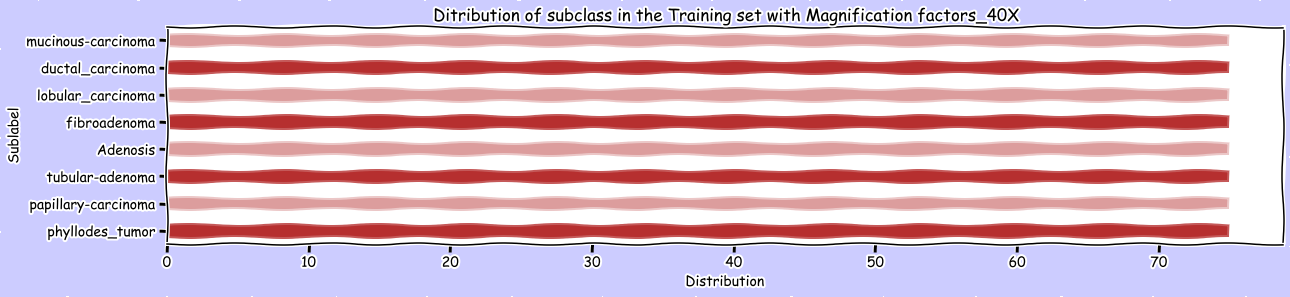

In [4]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_train.sublabel.value_counts().plot(kind='barh',color=['#b22222c0','#b2222240'],label='female')
    plt.title('Ditribution of subclass in the Training set with Magnification factors_40X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [5]:
def data_test():
        path_valid = glob.glob('BreakHis_40XX/Test_40/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path','M_F_40'])
        patient_id = []
        sublabel = []
        class_40=[]
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
            class_40.append('40_X')
        data['path'] = path_valid
        data['sublabel'] = sublabel
        data['M_F_40']=class_40
        return data
data_test=data_test()
print('Number of images in the testing set is {}'.format(len(data_test)))

Number of images in the testing set is 320


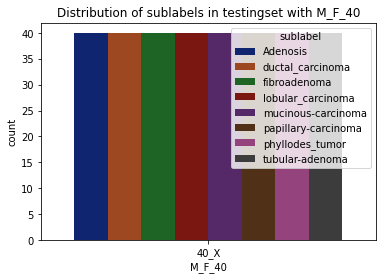

In [6]:
ax = sns.countplot(x="M_F_40",hue='sublabel', data=data_test,palette="dark").set_title('Distribution of sublabels in testingset with M_F_40')


 Digramm shows the Distribution of  of 8 subclasses in the Testing set

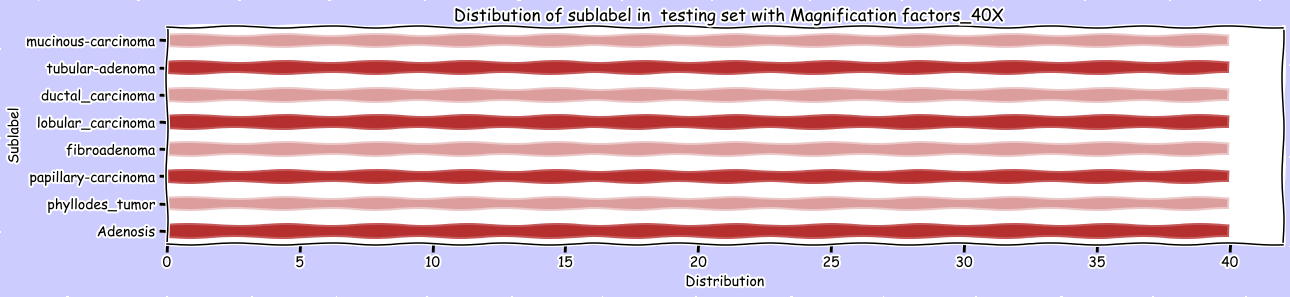

In [7]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_test.sublabel.value_counts().plot(kind='barh',color=['#b22222c0','#b2222240'],label='female')
    plt.title(' Distibution of sublabel in  testing set with Magnification factors_40X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [8]:
def data_train_100():
        path_train=glob.glob('BreakHis_100X/Train_100/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path','M_F_100'])
        patient_id=[]
        sublabel=[]
        class_100=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
                class_100.append('100_X')
        data['path']=path_train
        data['sublabel']=sublabel
        data['M_F_100']=class_100
        return data

data_train_100=data_train_100()
print('Number of images in the training set is {}'.format(len(data_train_100)))

Number of images in the training set is 594


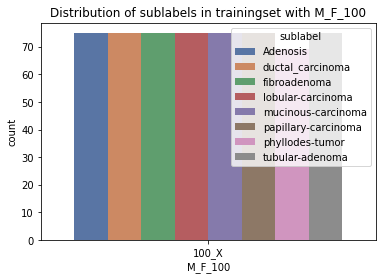

In [9]:
ax = sns.countplot(x="M_F_100",hue='sublabel', data=data_train_100,palette="deep").set_title('Distribution of sublabels in trainingset with M_F_100')


In [10]:
def data_test_100():
        path_valid = glob.glob('BreakHis_100X/Test_100/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path','M_F_100'])
        patient_id = []
        sublabel = []
        class_100=[]
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
            class_100.append('200_X')
        data['path'] = path_valid
        data['sublabel'] = sublabel
        data['M_F_100']=class_100
        return data
data_test_100=data_test_100()
print('Number of images in the testing set is {}'.format(len(data_test_100)))

Number of images in the testing set is 322


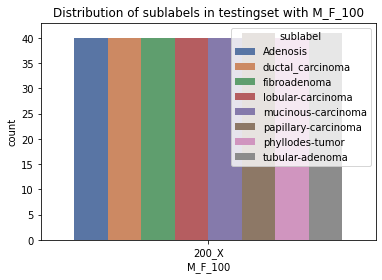

In [11]:
ax = sns.countplot(x="M_F_100",hue='sublabel', data=data_test_100,palette="deep").set_title('Distribution of sublabels in testingset with M_F_100')


In [12]:
def data_train_200():
        path_train=glob.glob('BreakHis_200X/Train_200/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path','M_F_200'])
        patient_id=[]
        sublabel=[]
        class_200=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
                class_200.append('200_X')
                
        data['path']=path_train
        data['sublabel']=sublabel
        data['M_F_200']=class_200
        return data

data_train_200=data_train_200()
print('Number of images in the training set is {}'.format(len(data_train_200)))

Number of images in the training set is 600


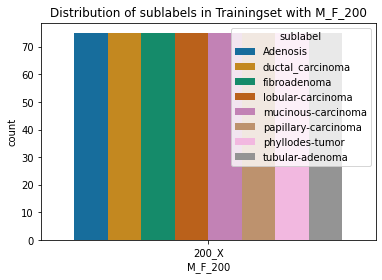

In [14]:
ax = sns.countplot(x="M_F_200",hue='sublabel', data=data_train_200,palette="colorblind").set_title('Distribution of sublabels in Trainingset with M_F_200')


In [15]:
def data_test_200():
        path_valid = glob.glob('BreakHis_200X/Test_200/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path','M_F_200'])
        patient_id = []
        sublabel = []
        class_200=[]
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
            class_200.append('200_X')
        data['path'] = path_valid
        data['sublabel'] = sublabel
        data['M_F_200']=class_200
        return data
data_test_200=data_test_200()
print('Number of images in the testing set is {}'.format(len(data_test_200)))

Number of images in the testing set is 320


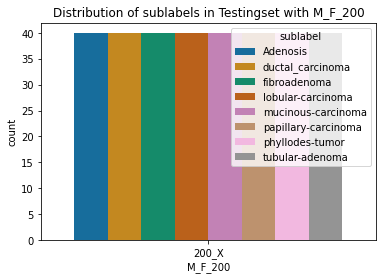

In [16]:
ax = sns.countplot(x="M_F_200",hue='sublabel', data=data_test_200,palette="colorblind").set_title('Distribution of sublabels in Testingset with M_F_200')


In [17]:
def data_train_400():
        path_train=glob.glob('BreakHis_400X/Train_400/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path','M_F_400'])
        patient_id=[]
        sublabel=[]
        class_400=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
                class_400.append('400_X')
        data['path']=path_train
        data['sublabel']=sublabel
        data['M_F_400']=class_400
        
        return data

data_train_400=data_train_400()
print('Number of images in the training set is {}'.format(len(data_train_400)))

Number of images in the training set is 600


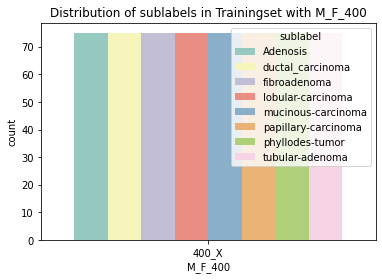

In [18]:
ax = sns.countplot(x="M_F_400",hue='sublabel', data=data_train_400,palette="Set3").set_title('Distribution of sublabels in Trainingset with M_F_400')


In [19]:
def data_test_400():
        path_valid = glob.glob('BreakHis_400X/Test_400/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path','M_F_400'])
        class_400=[]
        sublabel = []
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
            class_400.append('Sublabel')
        data['path'] = path_valid
        data['sublabel'] = sublabel
        data['M_F_400']=class_400
        return data
data_test_400=data_test_400()
print('Number of images in the testing set is {}'.format(len(data_test_400)))

Number of images in the testing set is 280


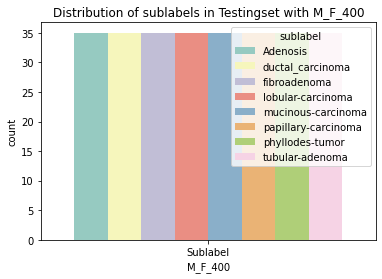

In [120]:
ax = sns.countplot(x="M_F_400",hue='sublabel', data=data_test_400,palette="Set3").set_title('Distribution of sublabels in Testingset with M_F_400')


In [28]:
def data_train():
    train_images=[]
    train_labels=[]
    SIZE=224
    i=0
    for directory_path in glob.glob("BreakHis_40XX/Train_40/*"):
        label = directory_path.split('\\')[-1]
        for img_path  in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path)       
                img = cv2.resize(img, (SIZE, SIZE))
                print(img_path)
                train_images.append(img)
                train_labels.append(label)
            except:
                break
    return train_images,train_labels
        
train_images,train_labels=data_train()

BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-002.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-003.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-004.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-005.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-006.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-007.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-008.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-009.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-010.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-011.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-012.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-013.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-014.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-015.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-016.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-017.png
BreakHis

BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-013.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-014.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-015.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-016.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-017.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-018.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-019.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-020.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-021.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-022.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-023.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-024.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-025.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-026.png
BreakHis_40XX/Train_40\fibroadenoma\SOB_B_F-14-1

BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-019.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-020.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-021.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-022.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-023.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-024.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-025.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-026.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-027.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-028.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-029.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-030.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-031.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-032.png
BreakHis_40XX/Train_

BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-008.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-009.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-010.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-011.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-012.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-013.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-014.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-015.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-016.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-017.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-018.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-019.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-020.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-

BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-001.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-002.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-003.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-004.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-005.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-006.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-007.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-008.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-009.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-010.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-011.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-028.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-029.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-030.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-

In [29]:
def data_test():
    test_images=[]
    test_labels=[]
    SIZE=224
    for directory_path in glob.glob("BreakHis_40XX/Test_40/*"):
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path) 
                img = cv2.resize(img, (SIZE, SIZE))
                test_images.append(img)
                test_labels.append(label)
            except:
                break
    return test_images,test_labels
        
test_images,test_labels=data_test()
print(len(test_labels))

320


convert images un und sublabel into array:

In [30]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)





transform String labels into integers labels

In [31]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)





In [32]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train=train_images
y_train=train_labels_encoded
x_test=test_images
y_test = test_labels_encoded



transform pixel in number between [0,1]

In [33]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [34]:
SIZE=224
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [36]:
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features

In [37]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
X_for_test = X_test_features

In [18]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.01,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test_features , y_test)]

model_xgboost.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

C:\Users\hasso\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78252
[1]	validation_0-auc:0.84203
[2]	validation_0-auc:0.86700
[3]	validation_0-auc:0.88012
[4]	validation_0-auc:0.89036
[5]	validation_0-auc:0.89549
[6]	validation_0-auc:0.90060
[7]	validation_0-auc:0.90542
[8]	validation_0-auc:0.90569
[9]	validation_0-auc:0.90651
[10]	validation_0-auc:0.90913
[11]	validation_0-auc:0.91000
[12]	validation_0-auc:0.91433
[13]	validation_0-auc:0.91370
[14]	validation_0-auc:0.91575
[15]	validation_0-auc:0.91699
[16]	validation_0-auc:0.91661
[17]	validation_0-auc:0.91753
[18]	validation_0-auc:0.92032
[19]	validation_0-auc:0.91974
[20]	validation_0-auc:0.92063
[21]	validation_0-auc:0.92246
[22]	validation_0-auc:0.92241
[23]	validation_0-auc:0.92350
[24]	validation_0-auc:0.92405
[25]	validation_0-auc:0.92484
[26]	validation_0-auc:0.92584
[27]	validation_0-auc:0.92433
[28]	validation_0-auc:0.92529
[29]	validation_0-auc:0.92625
[30]	validation_0-auc:0.92625
[31]	validation_0-auc:0.92676
[32]	validation_0-auc:0.92820
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [19]:
import sklearn.metrics as metrics
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model_xgboost.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
#from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.728125


In [20]:
y_train_pred = model_xgboost.predict_proba(X_for_training)[:,]
y_valid_pred = model_xgboost.predict_proba(X_test_features)[:,]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 1.0000
AUC Valid: 0.9542


In [529]:
x=set(le.inverse_transform(y_test))
print(x)

{'fibroadenoma', 'tubular-adenoma', 'mucinous-carcinoma', 'lobular_carcinoma', 'papillary-carcinoma', 'phyllodes_tumor', 'Adenosis', 'ductal_carcinoma'}


In [21]:
learning_rate_list = [0.1,0.01]
max_depth_list = [3,5,7]
n_estimators_list = [3000,5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(' Number of Comination is:',num_combinations)    
params_dict



 Number of Comination is: 12


{'learning_rate': [0.1, 0.01],
 'max_depth': [3, 5, 7],
 'n_estimators': [3000, 5000]}

In [26]:
def my_roc_auc_score(model_xgboost, X_for_training, y_train):
    
    return roc_auc_score(y_train, model_xgboost.predict_proba(X_for_training)[:,],multi_class="ovr")

print(my_roc_auc_score(model_xgboost, X_for_training, y_train))

NameError: name 'model_xgboost' is not defined

In [23]:

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=4,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X_for_training, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.828) total time= 4.7min
[CV 2/4] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.920) total time= 4.8min
[CV 3/4] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.876) total time= 4.8min
[CV 4/4] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.829) total time= 4.7min
[CV 1/4] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.828) total time= 7.0min
[CV 2/4] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.921) total time= 6.7min
[CV 3/4] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.876) total time= 6.6min
[CV 4/4] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.828) total time= 6.5min
[CV 1/4] EN

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [25]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

NameError: name 'model_xgboost_hp' is not defined

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

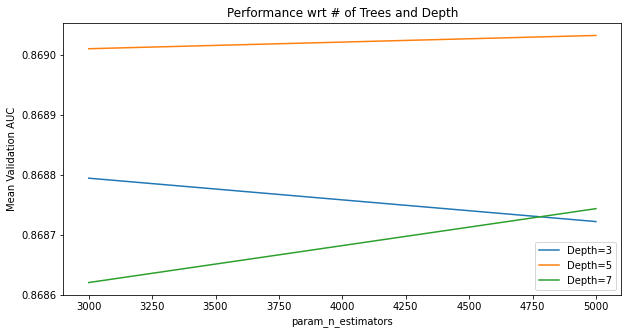

In [26]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
#lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
#lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

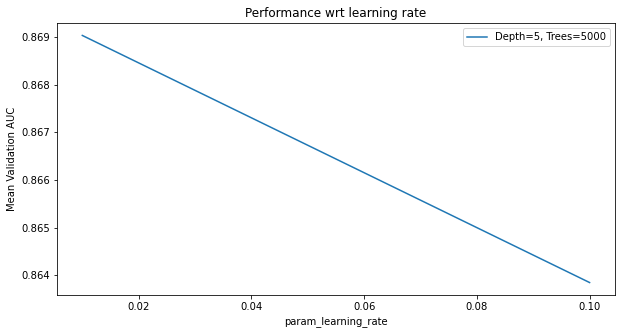

In [27]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==5000) & (df_cv_results['param_max_depth']==5),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=5, Trees=5000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [41]:

model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.01,
                                          max_depth=5,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_for_training, y_train),(X_test_features, y_test)]

y_score=model_xgboost_fin.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.88557	validation_1-auc:0.74653
[1]	validation_0-auc:0.94704	validation_1-auc:0.81512
[2]	validation_0-auc:0.96935	validation_1-auc:0.85356
[3]	validation_0-auc:0.98520	validation_1-auc:0.87117
[4]	validation_0-auc:0.99138	validation_1-auc:0.88858
[5]	validation_0-auc:0.99494	validation_1-auc:0.89741
[6]	validation_0-auc:0.99568	validation_1-auc:0.90535
[7]	validation_0-auc:0.99674	validation_1-auc:0.90973
[8]	validation_0-auc:0.99764	validation_1-auc:0.90919
[9]	validation_0-auc:0.99855	validation_1-auc:0.91128
[10]	validation_0-auc:0.99899	validation_1-auc:0.91546
[11]	validation_0-auc:0.99922	validation_1-auc:0.91557
[12]	validation_0-auc:0.99942	validation_1-auc:0.91604
[13]	validation_0-auc:0.99955	validation_1-auc:0.91877
[14]	validation_0-auc:0.99957	validation_1-auc:0.91955
[15]	validation_0-auc:0.99968	validation_1-auc:0.92374
[16]	validation_0-auc:0.99968	validation_1-auc:0.92446
[17]	validation_0-auc:0.99972	validation_1-auc:0.92502
[18]	validation_0-au

[149]	validation_0-auc:1.00000	validation_1-auc:0.95076
[150]	validation_0-auc:1.00000	validation_1-auc:0.95097
[151]	validation_0-auc:1.00000	validation_1-auc:0.95090
[152]	validation_0-auc:1.00000	validation_1-auc:0.95097
[153]	validation_0-auc:1.00000	validation_1-auc:0.95078
[154]	validation_0-auc:1.00000	validation_1-auc:0.95104
[155]	validation_0-auc:1.00000	validation_1-auc:0.95098
[156]	validation_0-auc:1.00000	validation_1-auc:0.95125
[157]	validation_0-auc:1.00000	validation_1-auc:0.95108
[158]	validation_0-auc:1.00000	validation_1-auc:0.95118
[159]	validation_0-auc:1.00000	validation_1-auc:0.95128
[160]	validation_0-auc:1.00000	validation_1-auc:0.95110
[161]	validation_0-auc:1.00000	validation_1-auc:0.95116
[162]	validation_0-auc:1.00000	validation_1-auc:0.95110
[163]	validation_0-auc:1.00000	validation_1-auc:0.95132
[164]	validation_0-auc:1.00000	validation_1-auc:0.95144
[165]	validation_0-auc:1.00000	validation_1-auc:0.95136
[166]	validation_0-auc:1.00000	validation_1-auc:

[296]	validation_0-auc:1.00000	validation_1-auc:0.95779
[297]	validation_0-auc:1.00000	validation_1-auc:0.95775
[298]	validation_0-auc:1.00000	validation_1-auc:0.95781
[299]	validation_0-auc:1.00000	validation_1-auc:0.95777
[300]	validation_0-auc:1.00000	validation_1-auc:0.95779
[301]	validation_0-auc:1.00000	validation_1-auc:0.95783
[302]	validation_0-auc:1.00000	validation_1-auc:0.95780
[303]	validation_0-auc:1.00000	validation_1-auc:0.95793
[304]	validation_0-auc:1.00000	validation_1-auc:0.95795
[305]	validation_0-auc:1.00000	validation_1-auc:0.95797
[306]	validation_0-auc:1.00000	validation_1-auc:0.95788
[307]	validation_0-auc:1.00000	validation_1-auc:0.95793
[308]	validation_0-auc:1.00000	validation_1-auc:0.95797
[309]	validation_0-auc:1.00000	validation_1-auc:0.95796
[310]	validation_0-auc:1.00000	validation_1-auc:0.95800
[311]	validation_0-auc:1.00000	validation_1-auc:0.95813
[312]	validation_0-auc:1.00000	validation_1-auc:0.95813
[313]	validation_0-auc:1.00000	validation_1-auc:

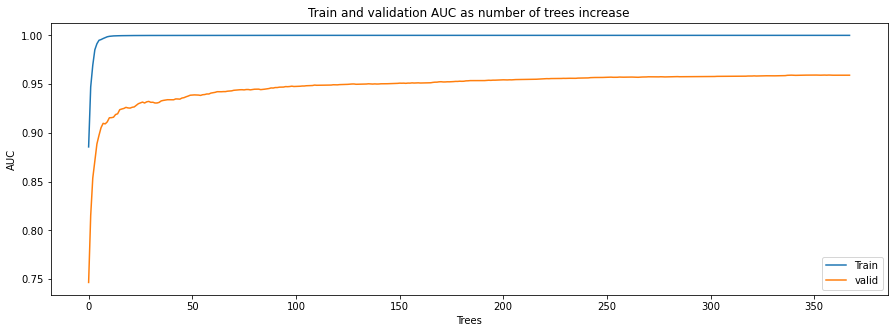

In [40]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [16]:
y_train_pred = model_xgboost_fin.predict_proba(X_for_training)
y_valid_pred = model_xgboost_fin.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 0.9997
AUC Valid: 0.8831


In [14]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [15]:
y_pred = model_xgboost_fin.predict(X_test_features)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)
prediction_0 = le.inverse_transform(predictions)
print(prediction_0)
print(test_labels)

Accuracy: 76.25%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 4, 3, 3, 0, 0, 2, 3, 2, 0, 5, 5, 1, 1, 1, 5, 4, 1, 1, 7, 1, 1, 2, 7, 3, 3, 1, 1, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 4, 4, 1, 5, 4, 0, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 0, 4, 2, 4, 4, 3, 0, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 4, 2, 2, 5, 2, 7, 4, 6, 4, 4, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 7, 1, 1, 7, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
['Adenosis' 'Adenosis'

In [18]:
y_train = label_binarize(y_train, classes=[0, 1, 2,3,4,5,6,7])
n_classes = y_train.shape[1]
print(n_classes)

8


ValueError: Invalid shape: (600, 8) for label

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'DC'),
 Text(0, 2.5, 'FB'),
 Text(0, 3.5, 'LC'),
 Text(0, 4.5, 'MC'),
 Text(0, 5.5, 'PC'),
 Text(0, 6.5, 'PT'),
 Text(0, 7.5, 'TA')]

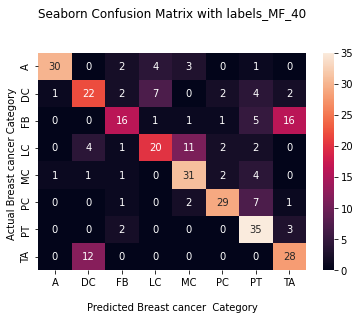

In [19]:
from sklearn.metrics import confusion_matrix
cm_grid = confusion_matrix(test_labels, prediction_0)
ax=sns.heatmap(cm_grid, annot=True)
ax.set_title('Seaborn Confusion Matrix with labels_MF_40\n\n');
ax.set_xlabel('\nPredicted Breast cancer  Category')
ax.set_ylabel('Actual Breast cancer Category ')
ax.xaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])
ax.yaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])





The prediction for this image is:  ['phyllodes_tumor']
The actual label for this image is:  phyllodes_tumor


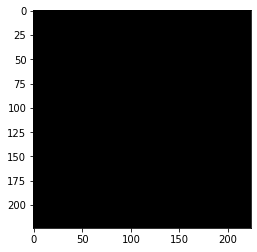

In [20]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model_xgboost_fin.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [21]:

Tp_0=cm_grid[0,0]
Tp_1=cm_grid[1,1]
Tp_2=cm_grid[2,2]
Tp_3=cm_grid[3,3]
Tp_4=cm_grid[4,4]
Tp_5=cm_grid[5,5]
Tp_6=cm_grid[6,6]
Tp_7=cm_grid[7,7]

FN_0=cm_grid[0,1]+cm_grid[0,2]+cm_grid[0,3]+cm_grid[0,4]+cm_grid[0,5]+cm_grid[0,6]+cm_grid[0,7]
FN_1=cm_grid[1,0]+cm_grid[1,2]+cm_grid[1,3]+cm_grid[1,4]+cm_grid[1,5]+cm_grid[1,6]+cm_grid[1,7]
FN_2=cm_grid[2,0]+cm_grid[2,1]+cm_grid[2,3]+cm_grid[2,4]+cm_grid[2,5]+cm_grid[2,6]+cm_grid[2,7]
FN_3=cm_grid[3,0]+cm_grid[3,1]+cm_grid[3,2]+cm_grid[3,4]+cm_grid[3,5]+cm_grid[3,6]+cm_grid[3,7]
FN_4=cm_grid[4,0]+cm_grid[4,1]+cm_grid[4,2]+cm_grid[4,3]+cm_grid[4,5]+cm_grid[4,6]+cm_grid[4,7]
FN_5=cm_grid[5,0]+cm_grid[5,1]+cm_grid[5,2]+cm_grid[5,3]+cm_grid[5,4]+cm_grid[5,6]+cm_grid[5,7]
FN_6=cm_grid[6,0]+cm_grid[6,1]+cm_grid[6,2]+cm_grid[6,3]+cm_grid[6,4]+cm_grid[6,5]+cm_grid[6,7]
FN_7=cm_grid[7,0]+cm_grid[7,1]+cm_grid[7,2]+cm_grid[7,3]+cm_grid[7,4]+cm_grid[7,5]+cm_grid[7,6]



Fp_0=cm_grid[1,0]+cm_grid[2,0]+cm_grid[3,0]+cm_grid[4,0]+cm_grid[5,0]+cm_grid[6,0]+cm_grid[7,0]
Fp_1=cm_grid[0,1]+cm_grid[2,1]+cm_grid[3,1]+cm_grid[4,1]+cm_grid[5,1]+cm_grid[6,1]+cm_grid[7,1]
Fp_2=cm_grid[0,2]+cm_grid[1,2]+cm_grid[3,2]+cm_grid[4,2]+cm_grid[5,2]+cm_grid[6,2]+cm_grid[7,2]
Fp_3=cm_grid[0,3]+cm_grid[1,3]+cm_grid[2,3]+cm_grid[4,3]+cm_grid[5,3]+cm_grid[6,3]+cm_grid[7,3]
Fp_4=cm_grid[0,4]+cm_grid[1,4]+cm_grid[2,4]+cm_grid[3,4]+cm_grid[5,4]+cm_grid[6,4]+cm_grid[7,4]
Fp_5=cm_grid[0,5]+cm_grid[1,5]+cm_grid[2,5]+cm_grid[3,5]+cm_grid[4,5]+cm_grid[6,5]+cm_grid[7,5]
Fp_6=cm_grid[0,6]+cm_grid[1,6]+cm_grid[2,6]+cm_grid[3,6]+cm_grid[4,6]+cm_grid[5,6]+cm_grid[7,6]
Fp_7=cm_grid[0,7]+cm_grid[1,7]+cm_grid[2,7]+cm_grid[3,7]+cm_grid[4,7]+cm_grid[5,7]+cm_grid[6,7]

l=[]
for i in range(len(cm_grid)):
    for j in range(len(cm_grid)):
        l.append(cm_grid[i,j])
        
    
Tn_0=sum(l)-Tp_0-FN_0-Fp_0
Tn_1=sum(l)-Tp_1-FN_1-Fp_1
Tn_2=sum(l)-Tp_2-FN_2-Fp_2
Tn_3=sum(l)-Tp_3-FN_3-Fp_3
Tn_4=sum(l)-Tp_4-FN_4-Fp_4
Tn_5=sum(l)-Tp_5-FN_5-Fp_5
Tn_6=sum(l)-Tp_6-FN_6-Fp_6
Tn_7=sum(l)-Tp_7-FN_7-Fp_7

TP=[Tp_0,Tp_1,Tp_2,Tp_3,Tp_4,Tp_5,Tp_6,Tp_7]
FN=[FN_0,FN_1,FN_2,FN_3,FN_4,FN_5,FN_6,FN_7]
FP=[Fp_0,Fp_1,Fp_2,Fp_3,Fp_4,Fp_5,Fp_6,Fp_7]
TN=[Tn_0,Tn_1,Tn_1,Tn_2,Tn_3,Tn_4,Tn_6,Tn_7]

df=pd.DataFrame(index=np.arange(0,8),columns=['TP','FN','FP','TN'])
df['TP']=TP
df['FN']=FN
df['FP']=FP
df['TN']=TN
print(df)




   TP  FN  FP   TN
0  30  10   2  278
1  22  18  17  263
2  16  24   9  263
3  20  20  12  271
4  31   9  17  268
5  29  11   7  263
6  35   5  23  257
7  28  12  22  258


In [22]:
df.rename(index={0:'A',1:'DC',2:'FB',3:'LC',4:'MC',5:'PC',6:'PT',7:'TA'},inplace=True)

df

,TP,FN,FP,TN
A,30,10,2,278
DC,22,18,17,263
FB,16,24,9,263
LC,20,20,12,271
MC,31,9,17,268
PC,29,11,7,263
PT,35,5,23,257
TA,28,12,22,258


In [76]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
sublabel=['A','DC','FB','LC','MC','PC','PT','TA']
ds=['TP','FN','FP','TN']
colors = ["#c9d9d3", "#718dbf", "#e84d60",'#ffa180']

data = {'sublabel' : sublabel,
        'TP'   : [32,24,32,26,33,27,37,33],
        'FN'   : [8,16,8,14,7,13,3,7],
        'FP'   : [5,12,9,12,17,6,9,6],
        'TN'  :[275,268,268,271,268,263,271,274]  
       }
p = figure(x_range=sublabel, height=250, title="Number of TP,FN,FP,TN with Magnification factors 40X",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(ds, x='sublabel', width=0.9, color=colors, source=data,
             legend_label=ds)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [25]:


'''prediction = model.predict(X_test_features)
from sklearn.preprocessing import OneHotEncoder
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)
print(roc_auc_score(y_test,model.predict_proba(X_test_features),multi_class='ovo'))




proba =model.predict_proba(X_test_features)
predicted_class0=proba[:,0]
predicted_class1=proba[:,1]
predicted_class2=proba[:,2]
predicted_class3=proba[:,3]
predicted_class4=proba[:,4]
predicted_class5=proba[:,5]
predicted_class6=proba[:,6]
predicted_class7=proba[:,7]
print('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))
print('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))
print('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))
print('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))
print('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))
print('  predicted probality for class 5 is : \n {}'.format(predicted_class5[:]))
print('  predicted probality for class 6 is : \n {}'.format(predicted_class6[:]))
print('  predicted probality for class 7 is : \n {}'.format(predicted_class7[:]))'''

"prediction = model.predict(X_test_features)\nfrom sklearn.preprocessing import OneHotEncoder\n#Inverse le transform to get original label back. \nprediction = le.inverse_transform(prediction)\nprint(roc_auc_score(y_test,model.predict_proba(X_test_features),multi_class='ovo'))\n\n\n\n\nproba =model.predict_proba(X_test_features)\npredicted_class0=proba[:,0]\npredicted_class1=proba[:,1]\npredicted_class2=proba[:,2]\npredicted_class3=proba[:,3]\npredicted_class4=proba[:,4]\npredicted_class5=proba[:,5]\npredicted_class6=proba[:,6]\npredicted_class7=proba[:,7]\nprint('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))\nprint('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))\nprint('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))\nprint('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))\nprint('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))\nprint('  predicted pr

In [26]:
#roc_auc_score(y_test, model.predict_proba(X_test_features), multi_class='ovr')

In [ ]:
import io

In [23]:
from sklearn.metrics import classification_report
>>> target_names =['Adenosis', 'ductal_carcinoma','fibroadenoma','lobular_carcinoma','mucinous-carcinoma','papillary-carcinoma','phyllodes_tumor','tubular-adenoma']
df=classification_report(y_test, predictions,target_names=target_names)
print(df)

                     precision    recall  f1-score   support

           Adenosis       0.94      0.75      0.83        40
   ductal_carcinoma       0.56      0.55      0.56        40
       fibroadenoma       0.64      0.40      0.49        40
  lobular_carcinoma       0.62      0.50      0.56        40
 mucinous-carcinoma       0.65      0.78      0.70        40
papillary-carcinoma       0.81      0.72      0.76        40
    phyllodes_tumor       0.60      0.88      0.71        40
    tubular-adenoma       0.56      0.70      0.62        40

           accuracy                           0.66       320
          macro avg       0.67      0.66      0.66       320
       weighted avg       0.67      0.66      0.66       320



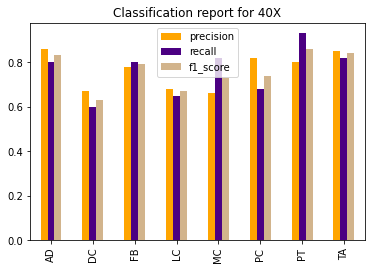

In [24]:
precision = [0.86, 0.67, 0.78, 0.68, 0.66, 0.82, 0.80,0.85]
recall = [0.80, 0.60,0.80,0.65, 0.82,0.68,0.93,0.82]
f1_score=[0.83,0.63,0.79, 0.67, 0.73, 0.74, 0.86,0.84]
index = ['AD','DC','FB','LC','MC','PC','PT','TA']
df = pd.DataFrame({'precision': precision,
                  'recall': recall,
                      'f1_score':f1_score}, index=index)
ax = df.plot.bar(color=['orange','indigo','tan'],title='Classification report for 40X')

In [78]:
# importing pandas as pd
import pandas as pd
  
# import the StrinIO function
# from io module
from io import StringIO
  
# wrap the string data in StringIO function
StringData = StringIO("""subclass;precision;recall;f1-score
                            AD;0.86;0.80;0.83
                        DC;0.67;0.60;0.63
                           FB;0.78 ;0.80 ; 0.79
                          LC;0.68  ;0.65 ;     0.67
                         MC;0.66      ;0.82;      0.73
                             pC;0.82   ;   0.68 ;     0.74
                            PT;0.80     ; 0.93    ;  0.86
                           TA ;0.85      ;0.82 ;     0.84
    """)
  
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =";")
  
# Print the dataframe
df=df.set_index('subclass')

In [79]:
print(type(predictions))

df.sort_values('f1-score',inplace=True)

<class 'list'>


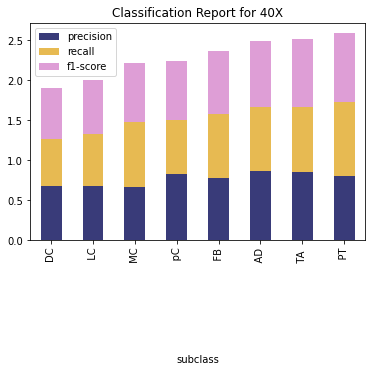

In [80]:
df.plot.bar(stacked=True,colormap='tab20b',title='Classification Report for 40X');

In [ ]:
accuracy=[]

Text(0.5, 1.0, 'Accuracy score in different MF using Raw  & Aug Data')

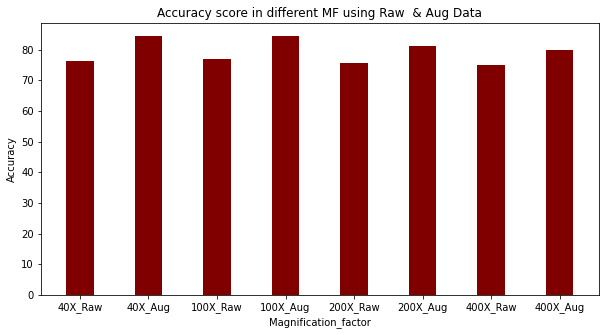

In [26]:
import numpy as np
import matplotlib.pyplot as plt
 
f= {'40X_Raw':76.25, '40X_Aug':84.45, '100X_Raw':77.02,
        '100X_Aug':84.38,'200X_Raw':75.62,'200X_Aug':81.25,'400X_Raw':75.00,'400X_Aug':80.00}
courses = list(f.keys())
values = list(f.values())
  
fig = plt.figure(figsize = (10, 5))


# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Magnification_factor")
plt.ylabel("Accuracy")
plt.title("Accuracy score in different MF using Raw  & Aug Data")


[Text(0, 0, '76.25'),
 Text(0, 0, '84.45'),
 Text(0, 0, '77.02'),
 Text(0, 0, '84.38'),
 Text(0, 0, '75.62'),
 Text(0, 0, '81.25'),
 Text(0, 0, '75'),
 Text(0, 0, '80')]

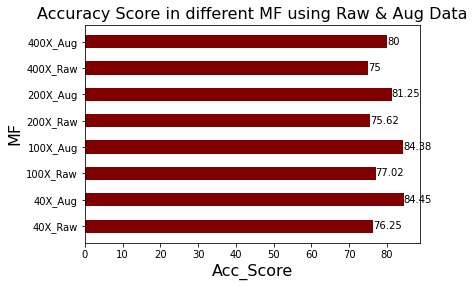

In [39]:


x = [u'40X_Raw', u'40X_Aug', u'100X_Raw', u'100X_Aug', u'200X_Raw', u'200X_Aug', u'400X_Raw', u'400X_Aug']
y = [76.25,84.45,77.02,84.38,75.62,81.25,75.00,80.00]
ind = np.arange(len(y))

fig, ax = plt.subplots()
ax.barh(ind, y,color='maroon', height=0.5)
plt.title("Accuracy Score in different MF using Raw & Aug Data", fontsize=16)
plt.xlabel("Acc_Score", fontsize=16)

plt.ylabel("MF", fontsize=16)
ax.set_yticks(ind)
ax.set_yticklabels(x)

# new helper method to auto-label bars
ax.bar_label(ax.containers[0])
